In [ ]:
class C:
    def __init__(self,x,y,z):
        self.x = x
        self.y = y
        self.z = z
    def print(self):
        for i in self.__dict__:
            print(f"{i}: {self.__dict__[i]}")

c = C(1,2,3)
c.print()

In [ ]:
from config import Args
arg = Args()
arg.write()
arg.mode = "train"
print("修改后：")
print(arg.addition())
arg.load("hyperparameter.npy")
print("修改前：")
print(arg.addition())

In [ ]:
from utils import plot_2
plot_2("results/data/pretrain_drop1_mfcc_smoothTrue_epoch100_l2re1_lr0002_train_metric.npy", "now")

In [ ]:
import torch
model = torch.load("pretrain_model.pt")
model_dict = model.state_dict()
# for k, v in model_dict.items():
#     print(k)

model_ = torch.load("models/model_drop1_mfcc_smoothTrue_epoch50_l2re1_lr0001_best.pt")
model_dict_ = model_.state_dict()
# for k, v in model_dict_.items():
#     print(k)
pretrained_dict = {k.replace("extractor", "generalFeatureExtractor"): v for k, v in model_dict.items() if k.replace("extractor", "generalFeatureExtractor") in model_dict_}
for k, v in pretrained_dict.items():
    print(k)


In [ ]:
import numpy as np
data = np.load("preprocess/npy/MODMA_16kHz_fastV3_order2.npy", allow_pickle=True).item()
x = data['x']
print(x.shape)

In [ ]:
from test_files import test_
test_(
    model_path="models/train_order3_drop1_mfcc_smoothTrue_epoch60_l2re1_lr0002_pretrainTrue_best.pt", wav_path="preprocess/MODMA_16kHz", num=100, num_class=2, order=3)


In [ ]:
import torchaudio
import torch
import librosa
import numpy as np
files = np.load("sample_wav.npy")
# expect_length = 160000
# stack_data = None
# for wav in files:
#     data, sr = torchaudio.load(wav)
#     actual_length = data.shape[1]
#     if actual_length < expect_length:
#         data = torch.cat([data, torch.zeros([1, expect_length - actual_length])], dim=1)
#     elif actual_length > expect_length:
#         data = data[:, :expect_length]
#     if stack_data is None:
#         stack_data = data
#     else:
#         stack_data = torch.cat([stack_data, data], dim=0)
# stack_data = stack_data.numpy().astype(np.float32)
# mfcc = librosa.feature.mfcc(y=stack_data, sr=16000, n_mfcc=13, n_fft=800)
# mfcc_delta = librosa.feature.delta(mfcc, width=3)
# mfcc_acc = librosa.feature.delta(mfcc_delta, width=3)
# mfcc = np.concatenate([mfcc, mfcc_delta, mfcc_acc], axis=1).astype(np.float32)

mfcc_ = np.load("mfcc.npy").astype(np.float32)
labels = np.load("labels.npy")
data = np.load("preprocess/npy/MODMA_16kHz_fastV2_order3.npy", allow_pickle=True).item()
print(data['y'])
for i in range(100):
    print(f"{files[i]}:{labels[i]}")
# print(np.max(np.abs(mfcc_-mfcc)))
# print(np.min(np.abs(mfcc_)))

In [ ]:
from utils import smooth_labels
import torch
import torch.nn.functional as F
a = torch.rand([4, 4])
b = torch.Tensor([[1.,0.,0.,0.],
                  [0.,1.,0.,0.],
                  [0.,0.,1.,0.],
                  [0.,1.,0.,0.]])
loss1 = F.cross_entropy(a,b,label_smoothing=0.1)
loss2 = F.cross_entropy(a, smooth_labels(b, 0.1))
print(loss1)
print(loss2)

In [ ]:
from utils import get_newest_file
print(get_newest_file("models"))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class simplemodel(nn.Module):
    def __init__(self):
        super(simplemodel, self).__init__()
        self.share_net = nn.Linear(4, 4, bias=False)
        self.fc1 = nn.Linear(4,2, bias=False)
        self.fc2 = nn.Linear(4,2, bias=False)
    def forward(self, x, index):
        x = self.share_net(x)
        if index == 1:
            x = self.fc1(x)
        else:
            x = self.fc2(x)
        return x

x1 = torch.rand([4,4])
x2 = torch.rand([4,4])
y1 = torch.rand([4,2])
y2 = torch.rand([4,2])
model = simplemodel()
# optimizer1 = torch.optim.Adam(
#     [{'params': model.share_net.parameters(), 'lr': 0.001},
#      {'params': model.fc1.parameters(), 'lr': 2e-3}])
# optimizer2 = torch.optim.Adam(
#     [{'params': model.share_net.parameters(), 'lr': 0.001},
#      {'params': model.fc2.parameters(), 'lr': 2e-3}])
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
out1 = model(x1,1)
out2 = model(x2,2)
print(model.share_net.weight)
print(model.fc1.weight)
print(model.fc2.weight)
loss1 = F.cross_entropy(out1, y1)
loss2 = F.cross_entropy(out2, y2)
# optimizer1.zero_grad()
# loss1.backward()
# optimizer1.step()
optimizer.zero_grad()
loss1.backward()
optimizer.step()
print("loss1: ")
print(model.share_net.weight)
print(model.fc1.weight)
print(model.fc2.weight)
# optimizer2.zero_grad()
# loss2.backward()
# optimizer2.step()
optimizer.zero_grad()
loss2.backward()
optimizer.step()
print("loss2: ")
print(model.share_net.weight)
print(model.fc1.weight)
print(model.fc2.weight)

In [ ]:
from utils import smooth_labels
import torch

x = torch.rand([100,16])
y = torch.rand([100,16])
loss1 = torch.nn.CrossEntropyLoss(label_smoothing=0.1)
loss2 = torch.nn.CrossEntropyLoss()
print(loss1(x,y))
print(loss2(x, smooth_labels(y,0.1)))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
lr = 1e-3
lrs = []
for i in range(100):
    lr_ = lr * (1. - i/100)
    lrs.append(lr_)

plt.plot(lrs)

In [ ]:
import torch
import torch.nn as nn


def print_(model):
    for name, params in model.named_parameters():
        print('-->name:', name)
        print('-->para:', params)
        print('-->grad_requires:', params.requires_grad)
        print('-->grad_value:', params.grad)
        print("===")

class simpleModel(nn.Module):
    def __init__(self):
        super(simpleModel, self).__init__()
        self.l = nn.Linear(4,2, bias=False)
    def forward(self,x):
        x = self.l(x)
        return x

def train_step(model, optimizer, x, y):
    out = model(x)
    loss = torch.nn.CrossEntropyLoss()(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

x = torch.rand([4,4])
y = torch.rand([4,2])
model = simpleModel()
print_(model)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train_step(model, optimizer, x,y)
print_(model)

train_step(model, optimizer, x, y)
print_(model)

In [ ]:
import torch
import torch.nn as nn
from einops.layers.torch import Rearrange
model1 = nn.Sequential(
    Rearrange("N L C W -> N L (C W)"),
    Rearrange("N L C -> N C L"),
)
model2 = Rearrange("N L C W -> N C (L W)")
x = torch.rand([4,313,39,1])
y1 = model1(x)
y2 = model2(x)
print(torch.sum(torch.abs(y1-y2)))

In [ ]:
import torch
model = torch.load("models/SET_official_train_order3_drop1_mfcc_smoothTrue_epoch60_l2re1_lr0008_pretrainFalse.pt")
torch.save(model, "test.h5")

In [ ]:
import librosa
import numpy as np
wav, sr = librosa.load("preprocess/datasets/RAVDESS/anger/03-01-05-01-01-01-01.wav", sr=None)
mfcc = librosa.feature.mfcc(y=wav, sr=sr)
print(mfcc.shape)
mfcc_mean = np.mean(mfcc.T, axis=0)
print(mfcc_mean.shape)

In [ ]:
from einops.layers.torch import Rearrange
import torch
x = torch.rand([4, 13, 100])
y1 = x.view(x.shape[0], -1)
y2 = Rearrange("N C L -> N (C L)")(x)
print(torch.sum(torch.abs(y1-y2)))

In [ ]:
from utils import myDataset
import numpy as np
import torch.utils.data
x = np.arange(20)
y = np.arange(20)
dataset = myDataset(x, y)
loader = torch.utils.data.dataloader.DataLoader(
    dataset=dataset,
    batch_size=8,
    shuffle=False
)
train_iter = iter(loader)
print(len(loader))
for _ in range(10):
    try:
        print(next(train_iter))
    except StopIteration:
        train_iter = iter(loader)
        print(next(train_iter))

In [ ]:
torch.cat([torch.zeros([12, 1]), torch.ones([12, 1])], dim=1).float()

In [ ]:
import torch.nn as nn
import torch
from utils import print_model
class simplemodel(nn.Module):
    def __init__(self):
        super(simplemodel, self).__init__()
        self.base = nn.Linear(4,4, bias=False)
        self.l1 = nn.Linear(4,3, bias=False)
        self.l2 = nn.Linear(4,2, bias=False)
    def forward(self, x, flag):
        x = self.base(x)
        if flag:
            x = self.l1(x)
        else:
            x = self.l2(x)
        return x

model = simplemodel()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
x = torch.rand([4,4])
y1_ = torch.rand([4,3])
y2_ = torch.rand([4,2])
y1 = model(x, True)
y2 = model(x, False)
loss1 = torch.nn.CrossEntropyLoss()(y1, y1_)
loss2 = torch.nn.CrossEntropyLoss()(y2, y2_)
loss = loss1+loss2
optimizer.zero_grad()
loss.backward()
print_model(model)
optimizer.step()

In [ ]:
def test():
    x = [[1,2,3], [2,3,4], [3,4,5]]
    return x
x,y,z = test()
print(x)

In [ ]:
from utils import plot
import numpy as np
wav2vec2_data = np.load("ser_pretrain/results/wav2vec2.npy", allow_pickle=True).item()
# plot(wav2vec2_data, model_name="wav2vec2",result_path="ser_pretrain/results/")
print(np.max(wav2vec2_data['val_acc']))
print(wav2vec2_data['train_acc'][np.argmax(wav2vec2_data['val_acc'])])

In [ ]:
from utils import plot
import numpy as np
hubert_data = np.load("ser_pretrain/results/hubert.npy", allow_pickle=True).item()
# plot(wav2vec2_data, model_name="hubert",result_path="ser_pretrain/results/")
print(np.max(hubert_data['val_acc']))
print(hubert_data['train_acc'][np.argmax(hubert_data['val_acc'])])

In [ ]:
val_accuracy = [1,2,5,6,7,7,7,10,5,5,5,5,5,5,5,5]
from utils import EarlyStopping
early_stop = EarlyStopping(5)
for i in range(len(val_accuracy)):
    print(val_accuracy[i])
    if early_stop(val_accuracy[i]):
        break
print("hello")


d:\python3_7\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
d:\python3_7\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
d:\python3_7\lib\site-packages\torch\optim\lr_scheduler.py:729: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


0.010079629669929565


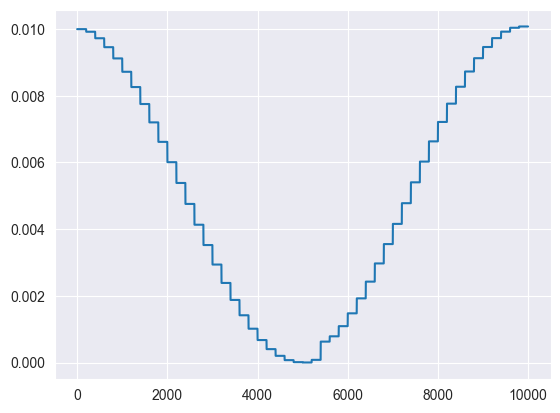

In [3]:
import numpy as np
import torch
from torchvision import models
import matplotlib.pyplot as plt

net = models.resnet18(pretrained=False)


max_epoch=50 # 一共50 epoch
iters=200    # 每个epoch 有 200 个 bach

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler =  torch.optim.lr_scheduler.CosineAnnealingLR(optimizer = optimizer,
                                                        T_max =  max_epoch/2, eta_min=1e-6) #  * iters

lr = []
for epoch in range(max_epoch):
    for batch in range(iters):
        optimizer.step()


        lr.append(scheduler.get_lr()[0])
    scheduler.step() # 注意 每个epoch 结束， 更新learning rate
print(lr[-1])
plt.plot(np.arange(len(lr)), lr)
plt.show()
# plt.savefig('aa.jpg')

